<a href="https://colab.research.google.com/github/Sana1960/aiml-projects/blob/main/TITANIC_SURVIVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📋 First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


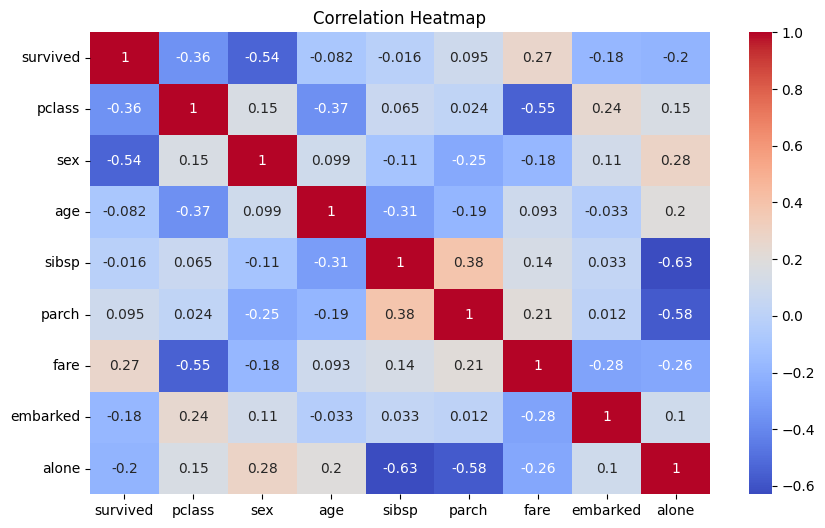


✅ Accuracy: 0.7832167832167832

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        80
           1       0.81      0.67      0.73        63

    accuracy                           0.78       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143


🧾 Confusion Matrix:
 [[70 10]
 [21 42]]


In [ ]:
# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔗 Load Titanic dataset from Seaborn
df = sns.load_dataset("titanic")

# 👀 View first few rows
print("📋 First 5 rows:\n", df.head())

# 🧹 Drop irrelevant columns and handle missing values
df = df.drop(["deck", "embark_town", "alive", "class", "who", "adult_male"], axis=1)
df = df.dropna()

# 🎯 Encode categorical variables
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])          # male=1, female=0
df["embarked"] = le.fit_transform(df["embarked"])  # C=0, Q=1, S=2

# 📊 Show correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 🧪 Split features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# ✂️ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 🤖 Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ✅ Predict and evaluate
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
